<a href="https://colab.research.google.com/github/OlhaZahrebelna/my_practis_on_github/blob/main/Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Профіль колонок набору даних:


datetime: дата та час зібрані погодинно

season: сезон (1: січень-березень, 2: квітень-червень, 3: липень-вересень, 4:жовтень грудень)

holiday: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)

workingday: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.

weather:
Ясно, Мало хмарно, частково хмарно
Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман

temp: температура в градусах Цельсія

atemp: як відчувається температура в градусах Цельсія

humidity: вологість

windspeed: швидкість вітру

casual: кількість неформальних користувачів

registered: кількість зареєстрованих користувачів

count: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/yulu_rental.csv')

In [4]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


Чи впливає сезоність на кількість орендованих велосипедів?

In [14]:
df.loc[10545]

,10545
datetime,2012-12-05 19:00:00
season,4
holiday,0
workingday,1
weather,1
temp,15.58
atemp,19.695
humidity,43
windspeed,23.9994
casual,14


In [16]:
df.loc[10]

,10
datetime,2011-01-01 10:00:00
season,1
holiday,0
workingday,0
weather,1
temp,15.58
atemp,19.695
humidity,76
windspeed,16.9979
casual,12


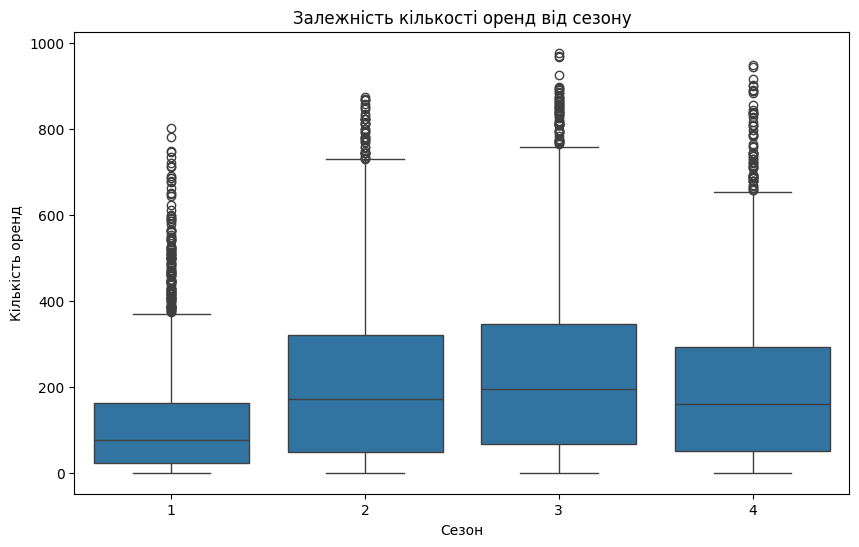

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=df)
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')
plt.title('Залежність кількості оренд від сезону')
plt.show()

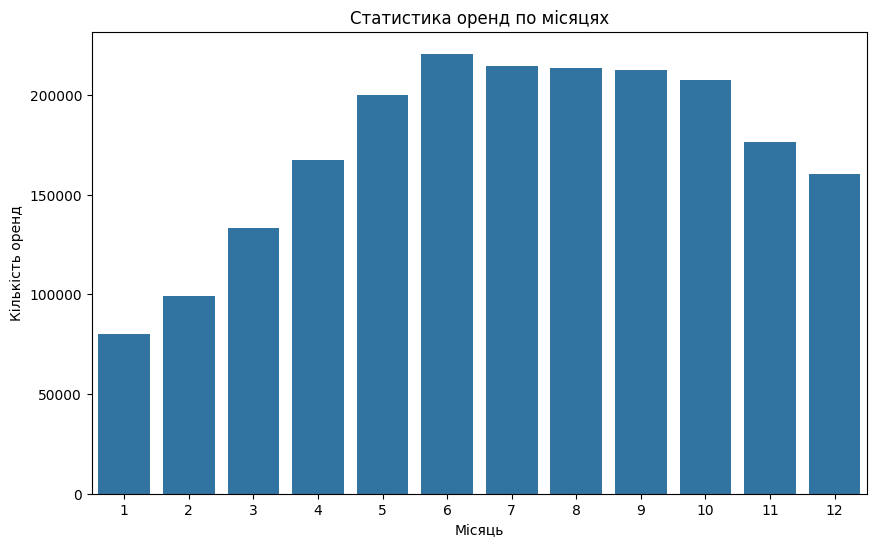

In [7]:
df['datetime'] = pd.to_datetime(df.datetime)
df['month'] = df['datetime'].dt.month
depend_month = df.groupby('month')['count'].sum().reset_index()
depend_month.columns = ['month', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='count', data=depend_month)
plt.xlabel('Місяць')
plt.ylabel('Кількість оренд')
plt.title('Статистика оренд по місяцях')
plt.show()

Ми дослідили взаємозв’язок між сезонністю та кількістю орендованих велосипедів. Згідно з графіком, можемо побачити чіткий сезонний патерн: у літній період попит на велосипеди найвищий, тоді як на весні та в осені він починає спадати. Взимку ми спостерігаємо найнижчі показники оренди, що може бути пов'язано з погіршенням погодних умов і зменшенням активності користувачів.
На основі цих даних, де відображена залежність кількості оренд від місяця, я побудувала ще один графік. Він демонструє, що у січні та лютому попит на велосипеди значно падає. Це надає можливість для планування технічного обслуговування велосипедів у цей період. З травня попит починає стрімко зростати і тримається на високому рівні аж до кінця року, де він знижується, але не настільки різко, як взимку.
Цей аналіз дозволяє оптимізувати ресурси, зосереджуючись на підготовці велосипедів до активного літнього сезону і враховуючи сезонні коливання попиту.

Чи впливає швидкість вітру на кількість орендованих велосипедів?

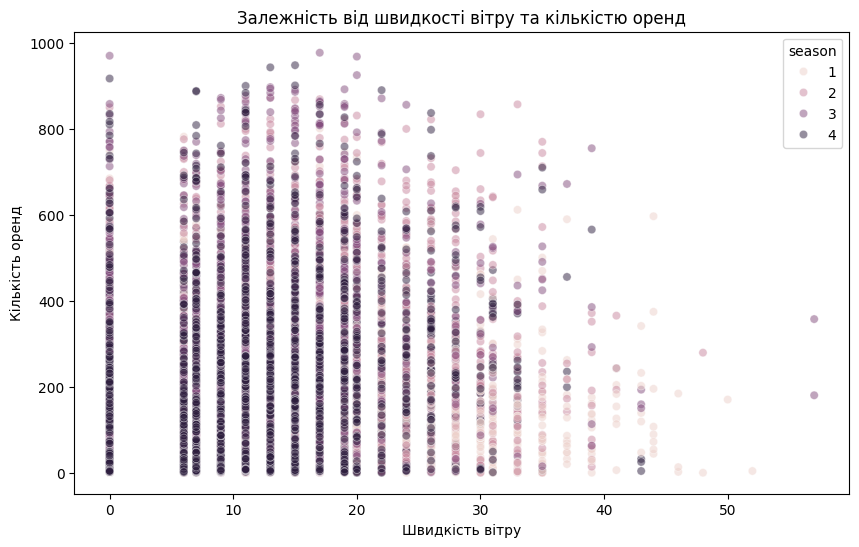

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='count', data=df, alpha=0.5, hue='season')
plt.xlabel('Швидкість вітру')
plt.ylabel('Кількість оренд')
plt.title('Залежність від швидкості вітру та кількістю оренд')
plt.show()

Ми дослідили залежність між швидкістю вітру та кількістю орендованих велосипедів. На графіку чітко видно, що зі зростанням швидкості вітру кількість оренд поступово зменшується. Це свідчить про те, що клієнти стають менш схильними орендувати велосипеди в умовах сильного вітру.
Також можна припустити, що взимку та на початку весни сильний вітер є однією з причин зниження кількості оренд. Це особливо актуально в періоди з низькими температурами, коли вітряна погода робить поїздки на велосипеді менш комфортними. Крім того, для цих сезонів важливо розглянути можливість додаткового захисту велосипедів від несприятливих погодних умов.
З огляду на це, пропонується встановити захищені місця для паркування велосипедів у локаціях, де сильні пориви вітру можуть пошкодити транспорт або зробити його менш привабливим для орендарів. Це допоможе мінімізувати втрати під час зимового та весняного сезонів і забезпечить кращий захист велосипедів у періоди несприятливих погодних умов.
Такий підхід не лише допоможе зберегти ресурси, але й може підвищити привабливість оренди в складних кліматичних умовах

Чи є залежність між випадковими та зареестрованими користувачами за сезонами?

In [10]:
df['datetime'] = pd.to_datetime(df.datetime)
df['time'] = df['datetime'].dt.time
depend_time = df.groupby('time')['count'].sum().reset_index()


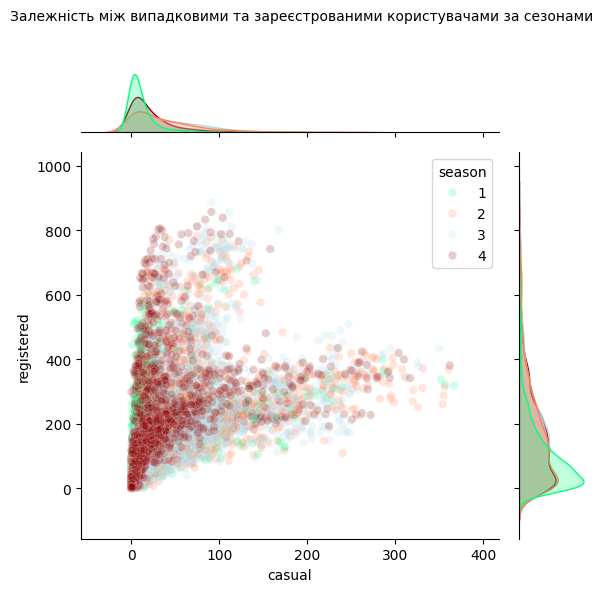

In [11]:
custom_palette = {1: 'springgreen', 2: 'coral', 3: 'lightblue', 4: 'darkred'}

g = sns.jointplot(data=df, x='casual', y='registered', hue='season', palette=custom_palette, alpha=.2)
plt.suptitle('Залежність між випадковими та зареєстрованими користувачами за сезонами', fontsize=10)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

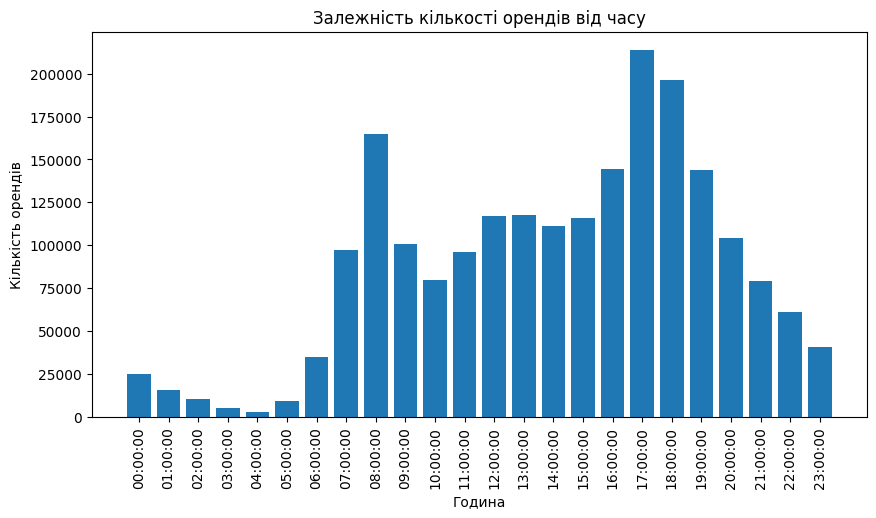

In [13]:
depend_time['time_str'] = depend_time['time'].astype(str)

fig = plt.figure(figsize=(10,5))
plt.bar(depend_time['time_str'], depend_time['count'])
plt.xticks(rotation=90)
plt.xlabel('Година')
plt.ylabel('Кількість орендів')
plt.title('Залежність кількості орендів від часу');

Ми бачимо скупчення в нижньому лівому куті, що свідчить про велику кількість даних із низьким попитом на велосипеди. Необхідно профільтрувати дані та виключити нічні години, або провести аналіз по годинах, щоб побачити, як змінюється попит протягом дня. Ми можемо побачити, чи є залежність від часу. Допоможе оптимізовувати ресурси. Також ми бачимо, що на графіку домінують точки з літа та зареєстровані клієнти. Це свідчить про те, що влітку попит на велосипеди вищий, що дозволяє ефективніше використовувати ресурси. Домінування постійних клієнтів вказує на успішну систему залучення та утримання користувачів. Крім того, спостерігаємо, що навесні кількість зареєстрованих клієнтів також перевищує кількість незареєстрованих, що підтверджує активну участь постійних користувачів у цей сезон.Ми можемо побачити час з низкою арендою це між 00:00 та 6:00. Ми можемо зробити нічний тариф , який буде нижче ніж денний